In [2]:
#importing the necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer  # For missing value imputation
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
import pandas as pd

# Define the file path
file_path = "Data_Set/new_df_without_outliers_copy_smote_resampled_noNormalised.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
print(df.head())


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,1.349487,0,1,-0.580455,0.629251,-0.317312,0.263730,-0.974068,0
1,0.149555,0,0,-0.241118,0.629251,-1.649552,-1.579747,-0.974068,0
2,-1.050377,0,0,-0.241118,-0.272192,0.082360,0.263730,1.211318,0
3,-0.681167,0,0,-0.857661,-0.973313,0.015748,0.331039,-0.974068,0
4,1.164882,1,1,-1.384988,-1.173634,0.015748,0.331039,1.211318,0
...,...,...,...,...,...,...,...,...,...
181139,1.349487,0,0,-0.261522,0.979109,-0.628168,1.103451,1.211318,1
181140,1.349487,0,0,-0.241118,-0.172031,0.015748,0.624467,-0.399610,1
181141,-0.727318,0,0,-0.241061,1.025419,0.104564,0.763605,1.211318,1
181142,0.334160,0,0,-0.241118,0.045409,0.015748,-1.579747,1.211318,1


In [5]:
#Separate features (X) and target variable (y)
X = df_without_outliers.drop("diabetes", axis=1)
y = df_without_outliers["diabetes"]

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create the random forest model (adjust hyperparameters if needed)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [9]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [10]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9812305059482734
Precision: 0.9863778472532381
Recall: 0.9759169244365886
F1-score: 0.9811195024433585


[Text(0.23016108651066794, 0.9864864864864865, 'x[5] <= -0.917\ngini = 0.5\nsamples = 91464\nvalue = [72430, 72485]'),
 Text(0.2299392709503064, 0.9594594594594594, 'gini = 0.0\nsamples = 13958\nvalue = [21988, 0]'),
 Text(0.2303829020710295, 0.9594594594594594, 'x[4] <= -0.272\ngini = 0.484\nsamples = 77506\nvalue = [50442, 72485]'),
 Text(0.053492235805537074, 0.9324324324324325, 'x[3] <= -0.237\ngini = 0.102\nsamples = 16698\nvalue = [25071, 1428]'),
 Text(0.035081517218432876, 0.9054054054054054, 'x[5] <= 1.237\ngini = 0.062\nsamples = 11388\nvalue = [17551.0, 577.0]'),
 Text(0.03485970165807131, 0.8783783783783784, 'x[1] <= 0.5\ngini = 0.05\nsamples = 11319\nvalue = [17551, 460]'),
 Text(0.02053180280596684, 0.8513513513513513, 'x[4] <= -0.623\ngini = 0.044\nsamples = 10842\nvalue = [16884, 390]'),
 Text(0.02030998724560528, 0.8243243243243243, 'gini = 0.0\nsamples = 8891\nvalue = [14170, 0]'),
 Text(0.0207536183663284, 0.8243243243243243, 'x[5] <= -0.095\ngini = 0.22\nsamples = 1

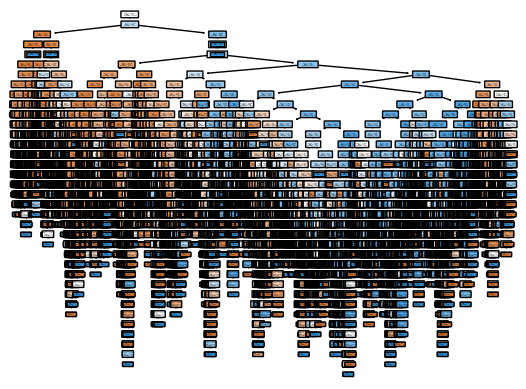

In [11]:
from sklearn.tree import plot_tree

# Choose a tree from the forest (e.g., the first tree)
tree = model.estimators_[0]

# Plot the tree
plot_tree(tree, filled=True, rounded=True)

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Get feature importance scores
importances = model.feature_importances_

In [14]:
importances

array([0.1725981 , 0.00305136, 0.00185487, 0.07862564, 0.33427856,
       0.19550482, 0.11134894, 0.10273772])

In [17]:
# Assuming your dataframe is called 'df'
feature_names = X.columns.tolist()  # Extract feature names as a list

feature_names

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'smoking_history_encoded',
 'gender_encoded']

Features with most importance: HbA1c Level

In [18]:
# Assuming your dataframe is called 'df'
feature_names = X.columns.tolist()  # Extract feature names as a list

feature_names

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'smoking_history_encoded',
 'gender_encoded']

In [19]:
# Sort features and importance scores together by importance (descending)
sorted_idx = importances.argsort()[::-1]
features_sorted = ["Feature " + str(i + 1) for i in sorted_idx]
importances_sorted = importances[sorted_idx]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(features_sorted, importances_sorted)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.show()

NameError: name 'plt' is not defined